# Coeficientes de Difusión

In [1]:
using LightGraphs
using GraphPlot
using Graphs
using DelimitedFiles
using LaTeXStrings
using GLM
using DataFrames
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas_art.csv", ',', String)
lista_aerolineas = info_aerolineas[:, 2]

30-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "MU"           
 "CZ"           
 "AF"           
 "CA"           
 "KE"           
 "HU"           
 "CX"           
 "GS"           
 ⋮              
 "SC"           
 "HO"           
 "JD"           
 "KA"           
 "8L"           
 "MI"           
 "FD"           
 "PN"           
 "EU"           
 "NS"           
 "KY"           
 "BX"           

In [3]:
"""
    import_matrix(arch::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function import_matrix(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end

import_matrix

In [4]:
"""
    airport_names(arch::AbstractString)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function airport_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',', String)
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end

airport_names

In [5]:
"""

    busca_WUH(list_aerop::Array{String, 1})

La función busca_WUH tiene como parámetros:
list_aerop, lista de aeropuertos de la aerolínea
La función lee la lista de aeropuertos de la aerolínea, busca el índice del aeropuerto WUH.
Regresa el índice del aeropuerto WUH.
"""
function busca_WUH(list_aerop::Array{String, 1})

    i = 1
    while list_aerop[i] != "WUH"
        i +=1
    end
    i
end

busca_WUH

In [6]:
"""
    my_graph(M::Array{Int64,2}, airline_code::String)

Función que hace el grafo de la red aérea dirigida.
"""
function my_graph(M::Array{Int64,2}, airline_code::String)

    grafo = DiGraph(M)

end

my_graph

## Coeficiente de Difusión

$$<x^2> = \frac{1}{N} \sum_{i=1}^{N} |x^{(i)} (t) - x_0|^2$$

$$ D = \frac{<x^2>}{2t}$$


In [7]:
function difusion_coeff2(num_airline_code::Int64)

NN = 0
Ls = []
#coefs_dif2 = []
DMS = []

for k = num_airline_code #2:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    #index_wuh = string(airline_code, "_WUH_index.csv") 
    #indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    #@show indice_wuh
    
    
    for i =1:1001 #tiempo
        
        NN = 0
        Ls = []
        col = rwn[:,i]
            #@show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                #@show j
                
                indice_aerop = col[j]
               
            if indice_aerop != 0
                    
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                dist_media = spls.dists[282]
          
                L = (dist_media)^2
                NN += 1
                #@show NN
            elseif indice_aerop == 0
                L = 0
                 #   @show NN
                #N = N - 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            #@show Ls
            L = 0
            dist_media = 0
        end
        
        dms2 = (sum(Ls))/NN
        push!(DMS, dms2)
        
        
        #D2 = dms2/(2*i)
        #push!(coefs_dif2, D2)
        #@show D2
    end
    
end
#coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS = convert(Array{Float64, 1}, DMS)
return DMS #, coefs_dif2
end

difusion_coeff2 (generic function with 1 method)

In [8]:
difusion_coeff2(2)

1001-element Array{Float64,1}:
 0.0               
 1.0               
 2.024             
 2.415             
 2.649             
 2.872             
 3.036             
 3.376             
 3.3753753753753752
 3.67967967967968  
 3.765765765765766 
 4.019019019019019 
 4.08008008008008  
 ⋮                 
 7.444277108433735 
 7.326807228915663 
 7.406626506024097 
 7.233433734939759 
 7.313253012048193 
 7.52790346907994  
 7.478129713423831 
 7.441930618401207 
 7.44947209653092  
 7.467571644042232 
 7.506787330316742 
 7.7631975867269984

In [9]:
desp_medio = ans

1001-element Array{Float64,1}:
 0.0               
 1.0               
 2.024             
 2.415             
 2.649             
 2.872             
 3.036             
 3.376             
 3.3753753753753752
 3.67967967967968  
 3.765765765765766 
 4.019019019019019 
 4.08008008008008  
 ⋮                 
 7.444277108433735 
 7.326807228915663 
 7.406626506024097 
 7.233433734939759 
 7.313253012048193 
 7.52790346907994  
 7.478129713423831 
 7.441930618401207 
 7.44947209653092  
 7.467571644042232 
 7.506787330316742 
 7.7631975867269984

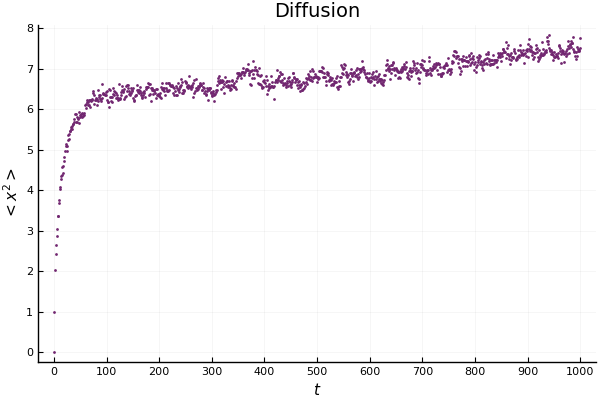

In [11]:

xs = collect(0:1000)
ys = desp_medio

g1 =scatter(xs, ys,
    xticks =:0:100:1000,
    yticks =:0:1:8,
    title = "Diffusion",
    xlabel = L"t",
    ylabel = L"<x^2>",
    legend = false,
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)

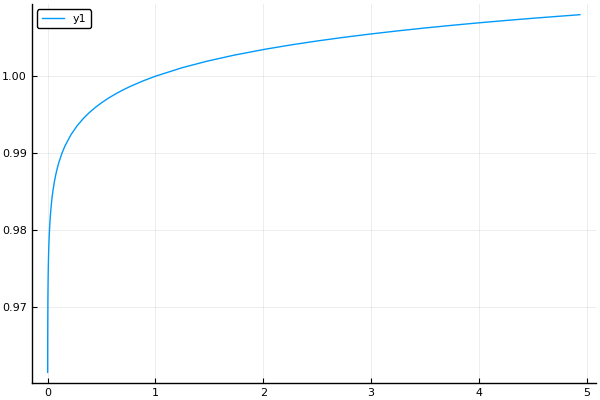

In [30]:
f(x) = x^(0.005)
Plots.plot(f, 0, 5) 